# Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# Aim :

1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
# To import the required dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To display all the columns at once

pd.set_option('display.max_columns',None)

In [3]:
# Getting the dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


__Now lets understand the various features of the dataset :__

__Date__ : The date of observation

__Location__ : The common name of the location of the weather station

__MinTemp__ : The minimum temperature in degrees celsius

__MaxTemp__ : The maximum temperature in degrees celsius

__Rainfall__ : The amount of rainfall recorded for the day in mm

__Evaporation__ :The so-called Class A pan evaporation (mm) in the 24 hours to 9am

__Sunshine__ : The number of hours of bright sunshine in the day.

__WindGustDir__ : The direction of the strongest wind gust in the 24 hours to midnight

__WindGustSpeed__ : The speed (km/h) of the strongest wind gust in the 24 hours to midnight

__WindDir9am__ : Direction of the wind at 9am

__WindDir3pm__ : Direction of the wind at 3pm

__WindSpeed9am__ : Wind speed (km/hr) averaged over 10 minutes prior to 9am

__WindSpeed3pm__ : Wind speed (km/hr) averaged over 10 minutes prior to 3pm

__Humidity9am__ : Humidity (percent) at 9am

__Humidity3pm__ : Humidity (percent) at 3pm

__Pressure9am__ : Atmospheric pressure (hpa) reduced to mean sea level at 9am

__Pressure3pm__ : Atmospheric pressure (hpa) reduced to mean sea level at 3pm

__Cloud9am__ : Fraction of sky obscured by cloud at 9am. 

__Cloud3pm__ : Fraction of sky obscured by cloud 

__Temp9am__ : Temperature (degrees C) at 9am

__Temp3pm__ : Temperature (degrees C) at 3pm

__RainToday__ : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

__RainTomorrow__ : The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

___From the dataset, it is observed that we have to predict both categorical and numerical data. Our targets are "RainTomorrow" and "Rainfall" respectively.___

# Exploratory Data Analysis :

In [4]:
# Checking shape of the dataset

df.shape

(8425, 23)

There are 8425 rows and 23 columns in our dataset.

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Checking datatype of the dataset

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Most of the features are float datatype and some are object datatype.

In [7]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are null values in our dataset.

Memory used by the dataset is 1.5+ MB.

__"Date" feature is object type in the dataset. We can handle it by separating the data, month and year values :__

In [8]:
#Extracting only Day from Date_of_journey column
df['Day']=pd.to_datetime(df.Date,format="%Y/%m/%d").dt.day

#Extracting only Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.month

#Extracting only Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.year

In [9]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008


3 new columns are added.

Hence we can drop "Date" column.

In [10]:
df.drop(['Date'],axis=1,inplace=True)

In [11]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008


_Successfully dropped._

In [12]:
#Checking for unique values in each feature

df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

Most of the features are numerical. Our target "RainTomorrow" is categorical and "Rainfall" is continuous numerical.

In [13]:
# To check the value count of eaach feature 

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
41.2        1
240.0       1
67.0        1
128.0       1
6.3         1
Name: Rainfall, Length: 250, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [14]:
# Checking for null values 

df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

We can also visualize and check :

In [15]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

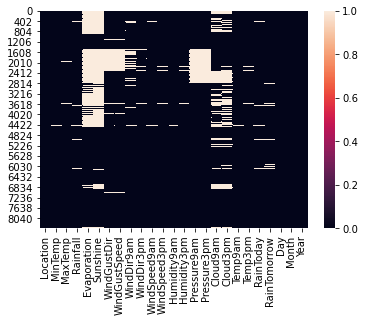

In [16]:
sns.heatmap(df.isnull())

There are lots of null values in our dataset. We have to handle them using imputation methods :

In [17]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

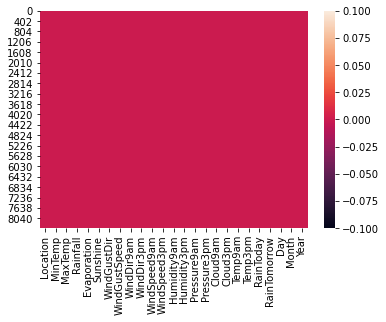

In [19]:
sns.heatmap(df.isnull())

Hence successfully replaced all the null values.

# Exploring output variable :

In [20]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df.RainTomorrow.value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

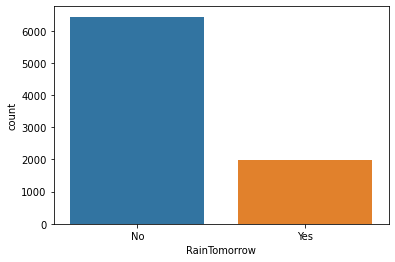

In [22]:
sns.countplot(x='RainTomorrow', data=df)

__<font color=orange>Here we can observe highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Location', ylabel='count'>

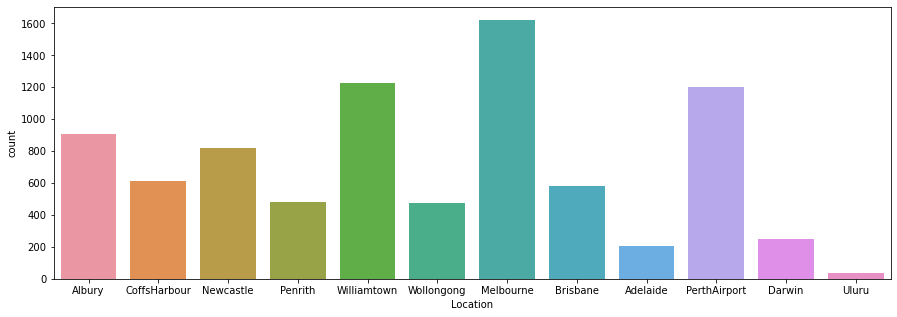

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x="Location",data=df)

Highest rainfall data is recorded from Melbourne and least from Uluru.

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

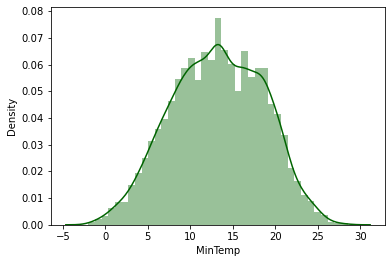

In [25]:
sns.distplot(df['MinTemp'], color='darkgreen')

Mostly data is recorded for 10 to 15 degrees of minimum temperature. And the data is normally distributed.

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

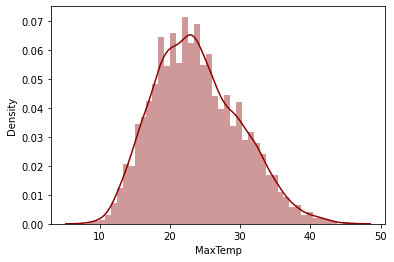

In [26]:
sns.distplot(df['MaxTemp'], color='darkred')

Maximum temperature ranges from 20 to 25 degrees. And this data is also normally distributed.

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

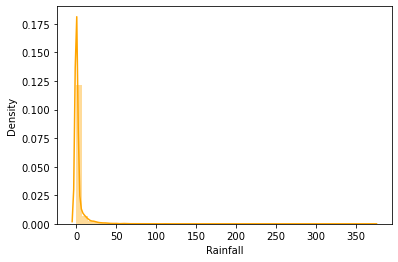

In [27]:
sns.distplot(df['Rainfall'], color='orange')

Rainfall has high right skewness.

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

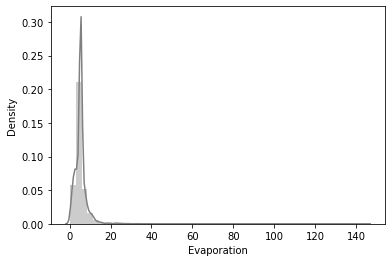

In [28]:
sns.distplot(df['Evaporation'], color='grey')

Evaporation also has highly right skewed data.

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

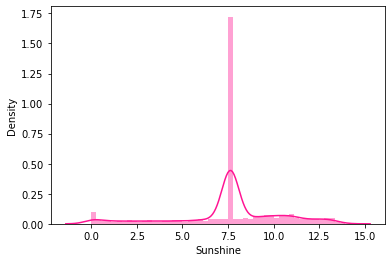

In [29]:
sns.distplot(df['Sunshine'], color='deeppink')

Sunshine also doesnt have normally distributed data.

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

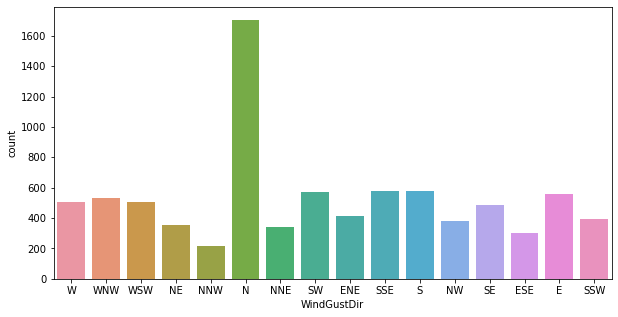

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="WindGustDir",data=df)

Direction of the strongest wind is towards the north mostly.

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

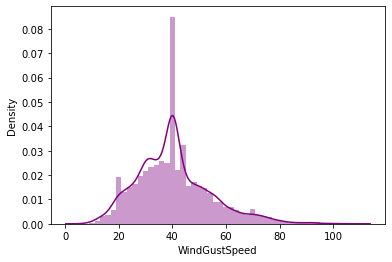

In [31]:
sns.distplot(df['WindGustSpeed'], color='purple')

The speed of the strongest wind is 40km/hr. And this is also right skewed.

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

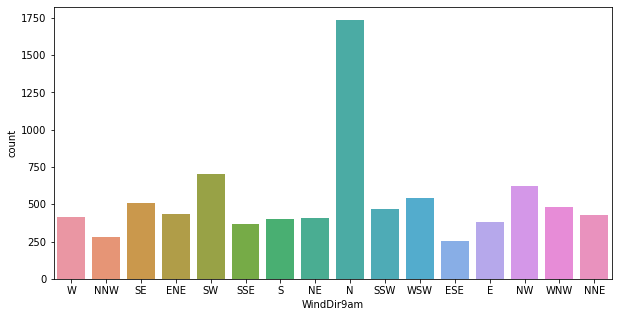

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='WindDir9am',data=df)

Direction of the wind at 9am is towards the North.

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

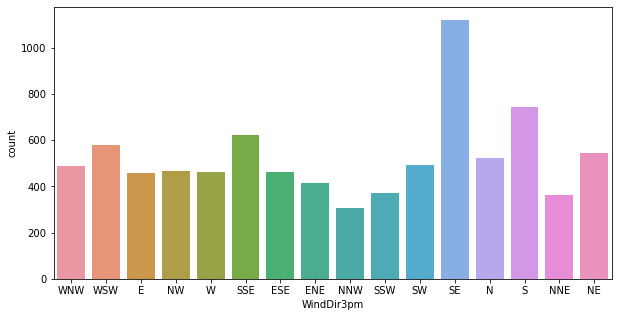

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='WindDir3pm',data=df)

Direction of the wind at 3pm is towards the South East.

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

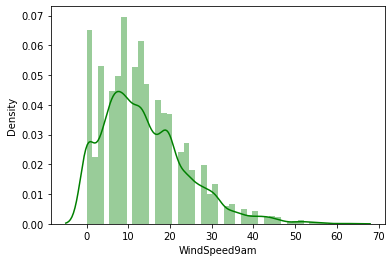

In [34]:
sns.distplot(df['WindSpeed9am'], color='green')

Speed of wind at 9am is mostly in the range of 8 to 12 km/hr. This feature is also right skewed.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

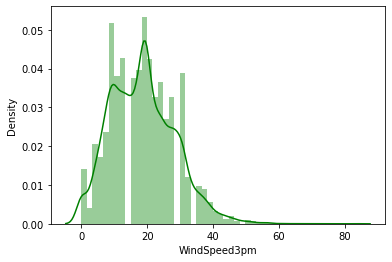

In [35]:
sns.distplot(df['WindSpeed3pm'], color='green')

Speed of wind at 3pm is mostly 20 km/hr. This feature is also right skewed.

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

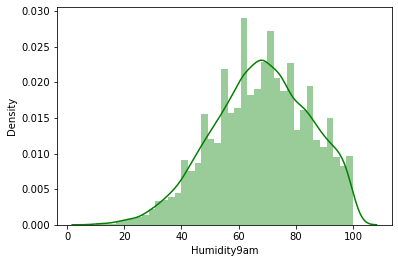

In [36]:
sns.distplot(df['Humidity9am'], color='green')

Humidity9am is left skewed.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

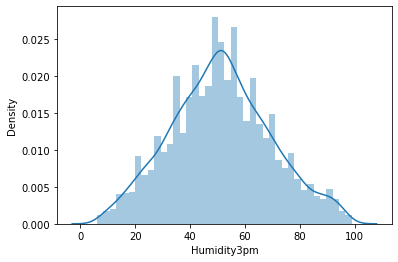

In [37]:
sns.distplot(df['Humidity3pm'])

Humidity is mostly 50% at 3pm. And this feature is normally distributed.

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

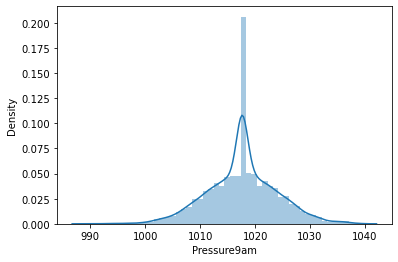

In [38]:
sns.distplot(df['Pressure9am'])

Not much skewness can be observed.

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

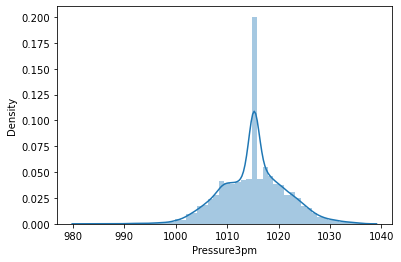

In [39]:
sns.distplot(df['Pressure3pm'])

Not much skewness can be observed.

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

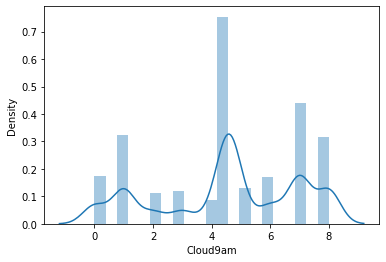

In [40]:
sns.distplot(df['Cloud9am'])

Here data is not normally distributed, but also no skewness is visible.

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

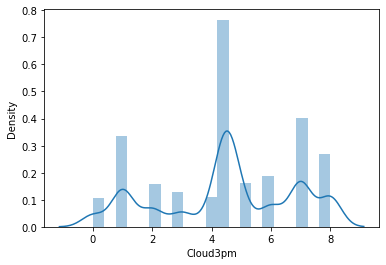

In [41]:
sns.distplot(df['Cloud3pm'])

Here data is not normally distributed, but also no skewness is visible.

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

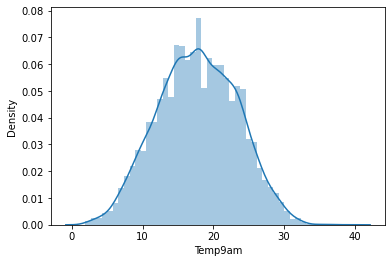

In [42]:
sns.distplot(df['Temp9am'])

Temperature at 9am is mostly around 20 degrees. And the data is normally distributed.

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

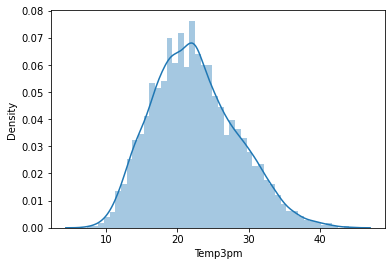

In [43]:
sns.distplot(df['Temp3pm'])

Temperature at 3pm is mostly around 20 to 23 degrees. And the data is normally distributed.

<AxesSubplot:xlabel='RainToday', ylabel='count'>

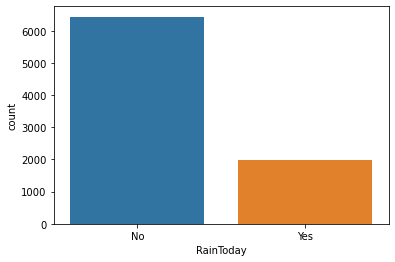

In [44]:
sns.countplot(x='RainToday',data=df)

Most likely of not raining on the present day.

# Bivariate Analysis :

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

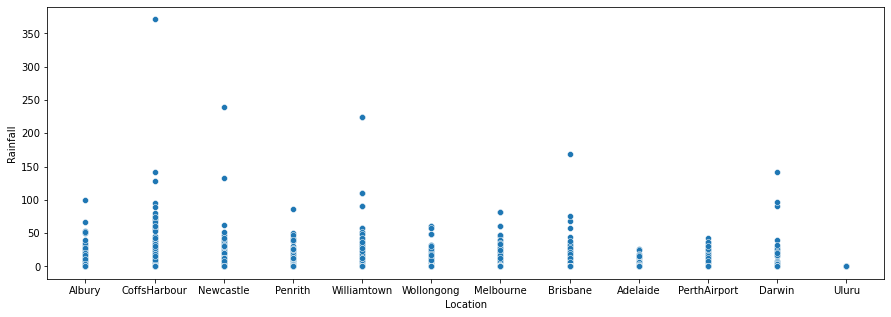

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Location',y='Rainfall',data=df)

Uluru has very less rainfall.

In [46]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

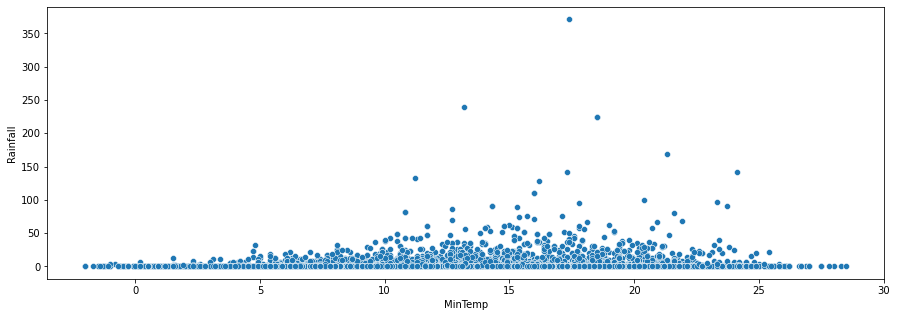

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='MinTemp',y='Rainfall',data=df)

<AxesSubplot:xlabel='Location', ylabel='RainTomorrow'>

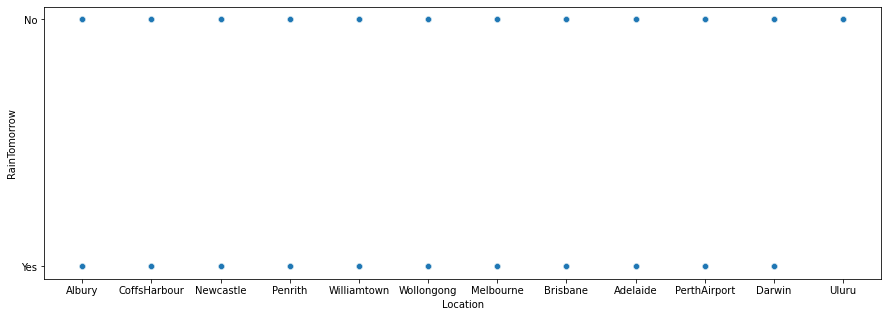

In [48]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Location',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Rainfall', ylabel='WindGustDir'>

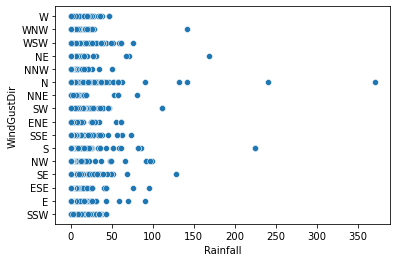

In [49]:
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

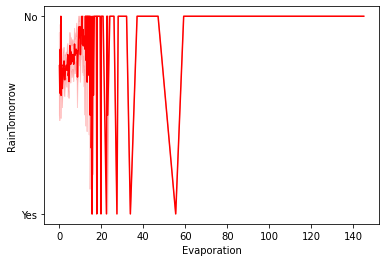

In [50]:
sns.lineplot(x='Evaporation',y='RainTomorrow',data=df,color='red')

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

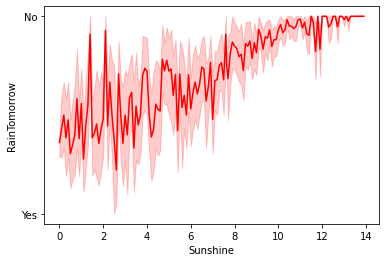

In [51]:
sns.lineplot(x='Sunshine',y='RainTomorrow',data=df,color='red')

Sunshine is directly proportional to RainTomorrow.

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

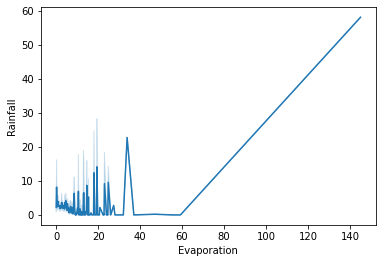

In [52]:
sns.lineplot(x='Evaporation',y='Rainfall',data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

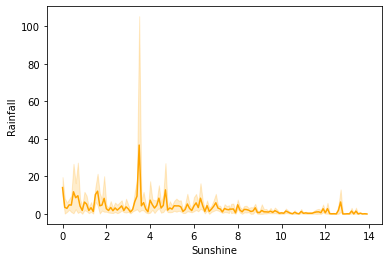

In [53]:
sns.lineplot(x='Sunshine',y='Rainfall',data=df,color='orange')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='RainTomorrow'>

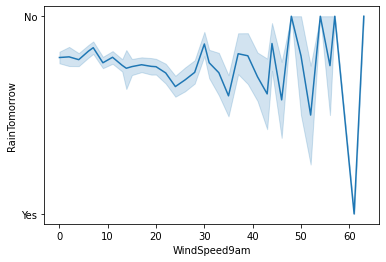

In [54]:
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='RainTomorrow'>

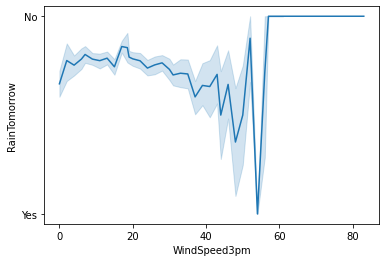

In [55]:
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

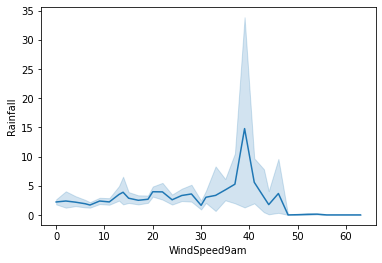

In [56]:
sns.lineplot(x='WindSpeed9am',y='Rainfall',data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

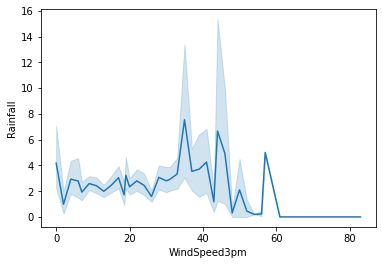

In [57]:
sns.lineplot(x='WindSpeed3pm',y='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='RainTomorrow'>

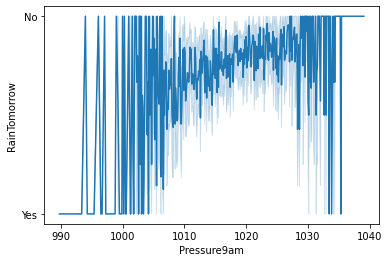

In [58]:
sns.lineplot(x='Pressure9am',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='RainTomorrow'>

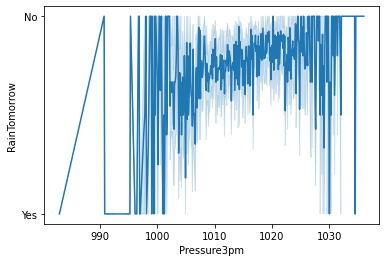

In [59]:
sns.lineplot(x='Pressure3pm',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

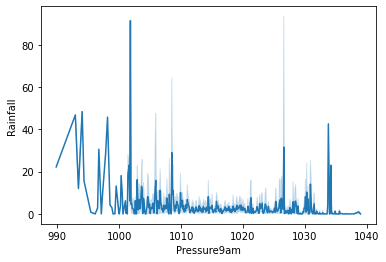

In [60]:
sns.lineplot(x='Pressure9am',y='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

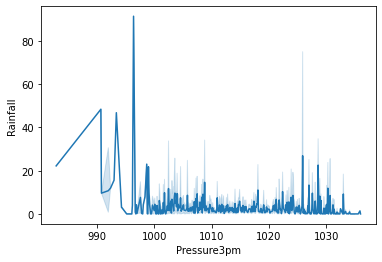

In [61]:
sns.lineplot(x='Pressure3pm',y='Rainfall',data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='RainTomorrow'>

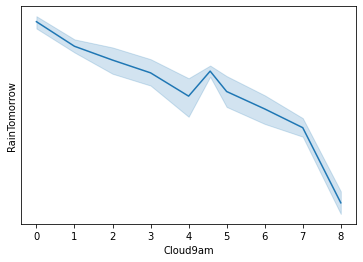

In [62]:
sns.lineplot(x='Cloud9am',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainTomorrow'>

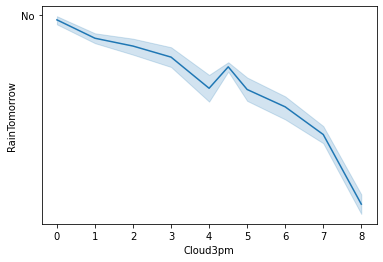

In [63]:
sns.lineplot(x='Cloud3pm',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

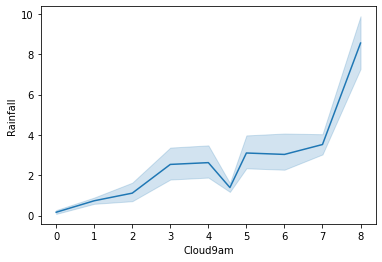

In [64]:
sns.lineplot(x='Cloud9am',y='Rainfall',data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

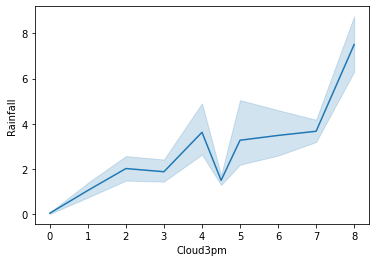

In [65]:
sns.lineplot(x='Cloud3pm',y='Rainfall',data=df)

<AxesSubplot:xlabel='Temp9am', ylabel='RainTomorrow'>

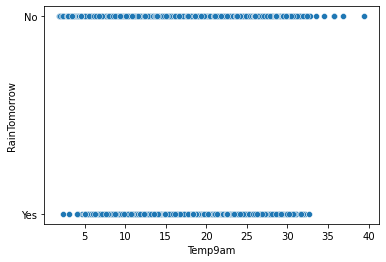

In [66]:
sns.scatterplot(x='Temp9am',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='RainTomorrow'>

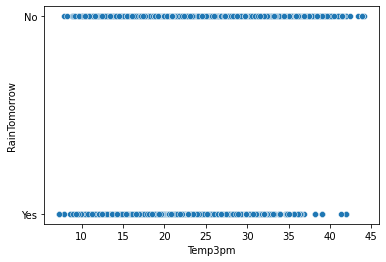

In [67]:
sns.scatterplot(x='Temp3pm',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

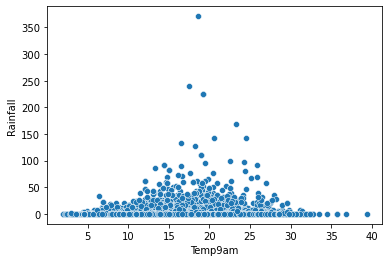

In [68]:
sns.scatterplot(x='Temp9am',y='Rainfall',data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

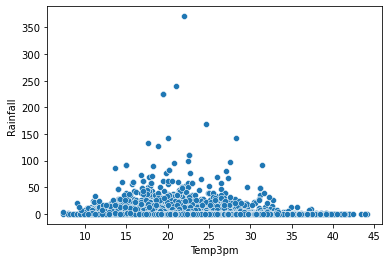

In [69]:
sns.scatterplot(x='Temp3pm',y='Rainfall',data=df)

<AxesSubplot:xlabel='Day', ylabel='RainTomorrow'>

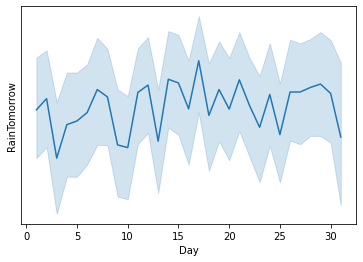

In [70]:
sns.lineplot(x='Day',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Month', ylabel='RainTomorrow'>

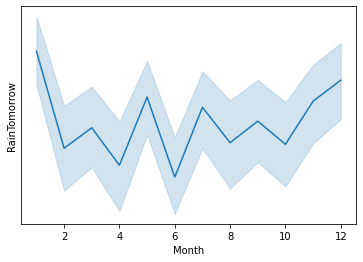

In [71]:
sns.lineplot(x='Month',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Year', ylabel='RainTomorrow'>

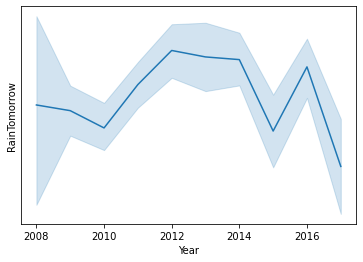

In [72]:
sns.lineplot(x='Year',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='Day', ylabel='Rainfall'>

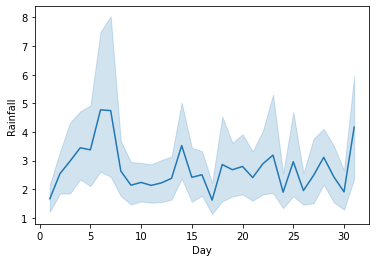

In [73]:
sns.lineplot(x='Day',y='Rainfall',data=df)

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

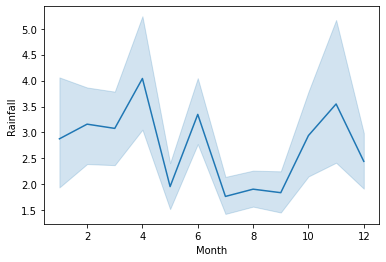

In [74]:
sns.lineplot(x='Month',y='Rainfall',data=df)

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

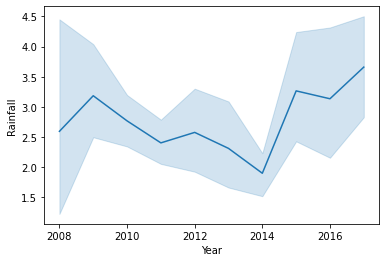

In [75]:
sns.lineplot(x='Year',y='Rainfall',data=df)

Observing all the graphs, some of the features are positively related to the targets, and some are inversely proportional, which is clearly visible.

# Label Encoder :

In [76]:
from sklearn import preprocessing

In [77]:
le = preprocessing.LabelEncoder()

In [78]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [79]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
5,1,14.6,29.7,0.2,5.389395,7.632205,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.566622,4.503183,20.6,28.9,0,0,6,12,2008
6,1,14.3,25.0,0.0,5.389395,7.632205,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.503183,18.1,24.6,0,0,7,12,2008
7,1,7.7,26.7,0.0,5.389395,7.632205,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.566622,4.503183,16.3,25.5,0,0,8,12,2008
8,1,9.7,31.9,0.0,5.389395,7.632205,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,4.566622,4.503183,18.3,30.2,0,1,9,12,2008
9,1,13.1,30.1,1.4,5.389395,7.632205,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,4.566622,4.503183,20.1,28.2,1,0,10,12,2008


_So all the features are converted into numeric form._

In [80]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Location,8425.0,5.793591,3.162654,0.0,3.000000,6.000000,8.000000,11.0
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.000000,0.000000,0.800000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustDir,8425.0,7.217804,4.702616,0.0,3.000000,7.000000,12.000000,15.0
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindDir9am,8425.0,7.267418,4.588045,0.0,3.000000,7.000000,12.000000,15.0
WindDir3pm,8425.0,7.810445,4.430162,0.0,4.000000,8.000000,11.000000,15.0


__Observations :__
    
    1. Some of the features has skewness, due the difference between mean median of that features.
    2. Much outliers are present due to huge differences between the 75th percentile and the max value.

In [81]:
# Checking Skewness of the dataset

df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.200523
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__
    
    "Rainfall" and "Evaporation" are highly skewed.

In [82]:
import numpy as np

In [83]:
df['Rainfall']=np.sqrt(df['Rainfall'])
df['Evaporation']=np.sqrt(df['Evaporation'])

In [84]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         2.979598
Evaporation      1.645178
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed    0.757000
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
Day              0.004260
Month            0.039388
Year             0.418663
dtype: float64

Skewness of Rainfall and Evaporation are reduced to an exceptable range.

# Detecting Outliers :

Location            AxesSubplot(0.125,0.749828;0.133621x0.130172)
MinTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MaxTemp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Rainfall         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Sunshine            AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindGustDir      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindGustSpeed     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
WindDir9am       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
WindDir3pm       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
WindSpeed9am        AxesSubplot(0.125,0.437414;0.133621x0.130172)
WindSpeed3pm     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Humidity9am       AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Humidity3pm      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Pressure9am      AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Pressure3p

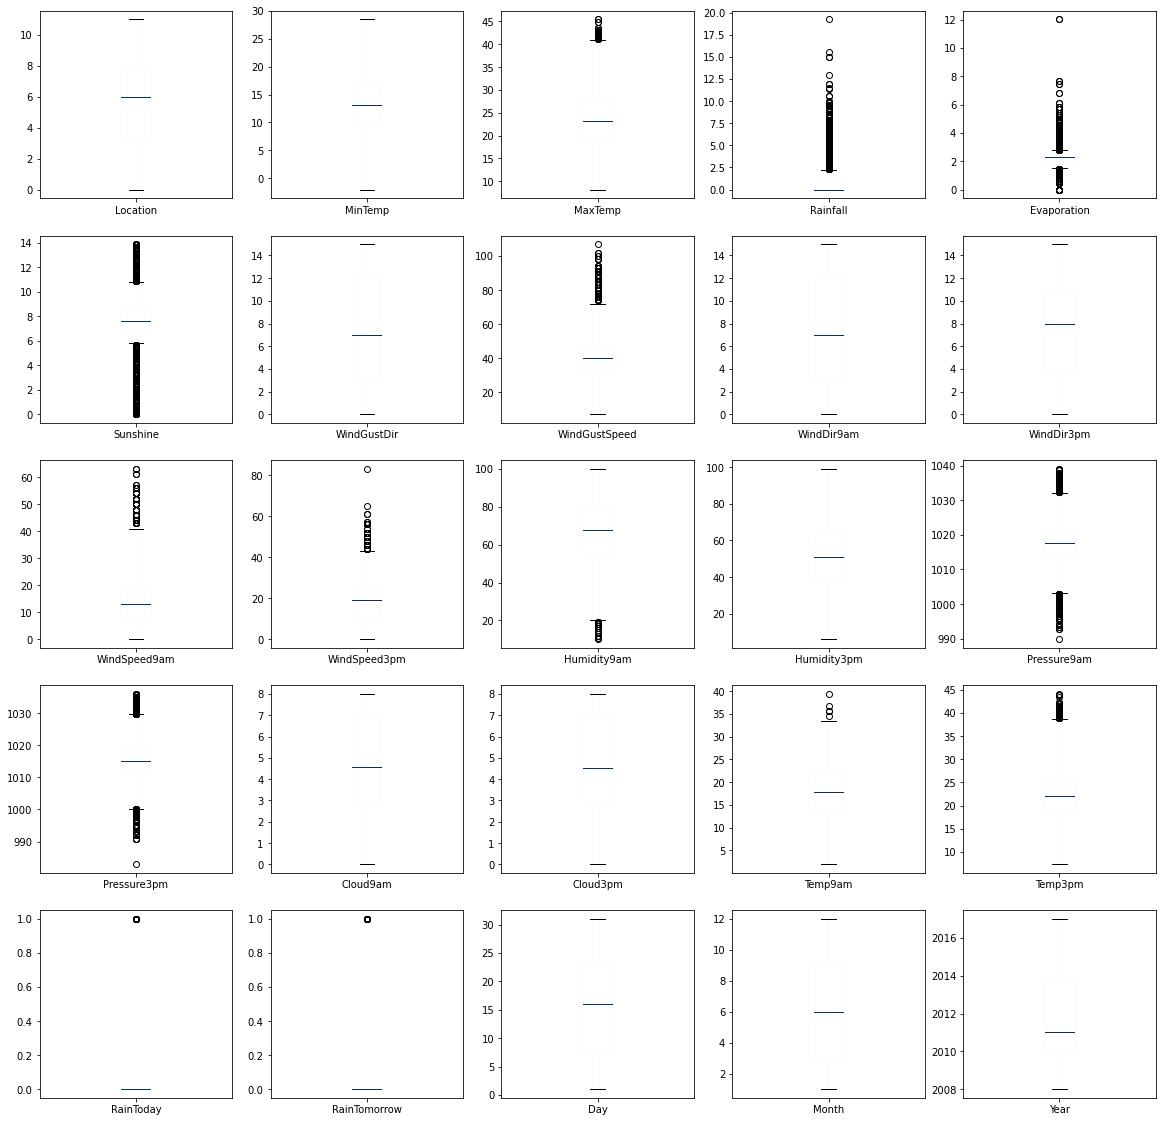

In [85]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20), colormap='Blues')

Lots of outliers can be observed, and needs to be removed as well.

In [86]:
# Importing required zscore library

from scipy.stats import zscore

In [87]:
z=np.abs(zscore(df))

In [88]:
threshold=3

In [89]:
df_new=df[(z<3).all(axis=1)] 

In [90]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (8425, 25)


In [91]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (7921, 25)


In [92]:
# Data loss percentage

loss=((8425-7921)/8425)*100
print('Data loss percentage ',loss)

Data loss percentage  5.982195845697329


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 6% and we can't afford to lose more data and will proceed further with these values.

In [93]:
df=df_new
df.shape

(7921, 25)

# Classification models to forecast whether or not it will rain tomorrow :

In [94]:
# Data part

x=df.drop(['RainTomorrow'],axis=1)
x.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,1,13.4,22.9,0.774597,2.321507,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.503183,16.9,21.8,0,1,12,2008


In [95]:
# Target

y=df.RainTomorrow
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [96]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [98]:
vif_calc()

       VIF Factor       Features
0        5.024322       Location
1       59.215949        MinTemp
2      440.116574        MaxTemp
3        5.995049       Rainfall
4       28.023423    Evaporation
5       16.886204       Sunshine
6        5.342030    WindGustDir
7       24.236165  WindGustSpeed
8        4.713528     WindDir9am
9        6.108658     WindDir3pm
10       6.007657   WindSpeed9am
11       9.499918   WindSpeed3pm
12      70.128058    Humidity9am
13      48.157248    Humidity3pm
14  578907.312976    Pressure9am
15  559548.113519    Pressure3pm
16       8.604028       Cloud9am
17       8.598933       Cloud3pm
18     193.044819        Temp9am
19     522.266018        Temp3pm
20       5.797466      RainToday
21       4.208746            Day
22       5.221563          Month
23   45164.884922           Year


Many columns have high multi colinearity : MinTemp, MaxTemp, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm, Year.

Now we need to check the individual impact on the target[RainTomorrow], from these attributes.

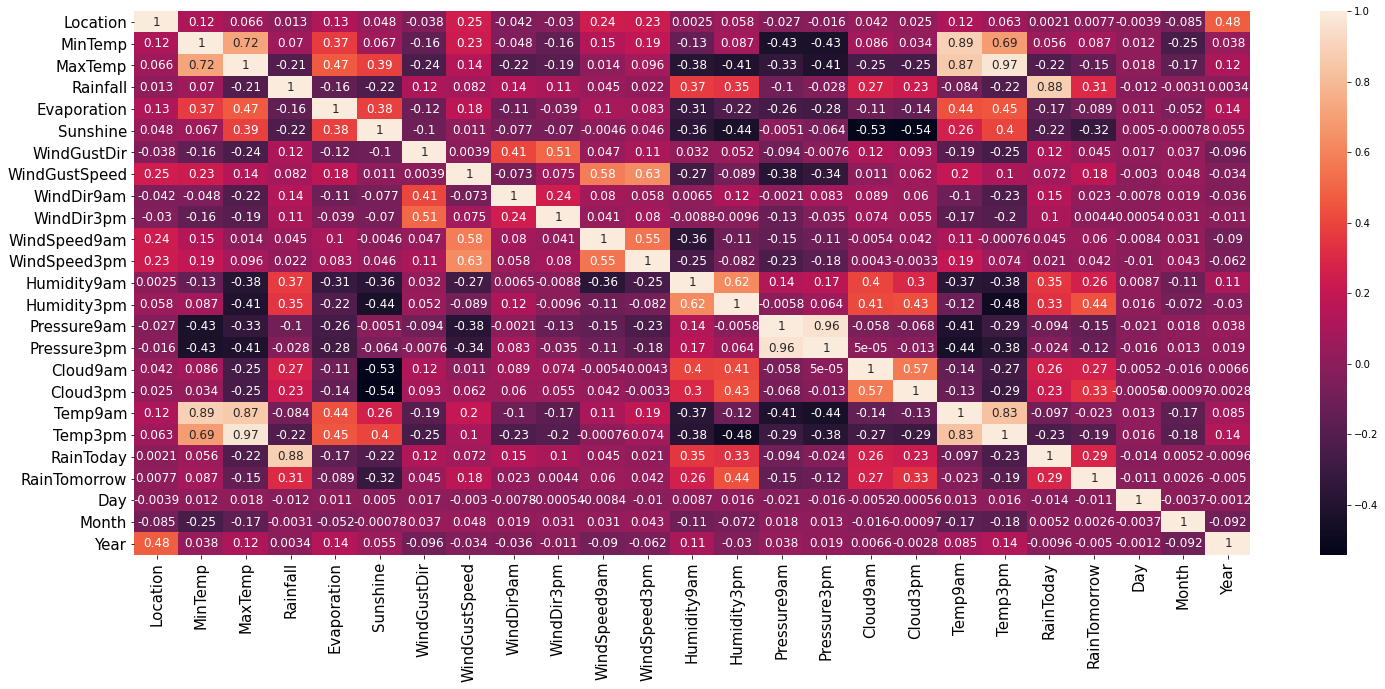

In [99]:
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

All the features have moderate correlation with the target.

However, we can drop Pressure9am, Pressure3pm because of very high multi colinearity :

In [100]:
df.drop(['Pressure9am', 'Pressure3pm'],axis=1,inplace=True)

In [101]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

_Successfully dropped._

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [102]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [103]:
x=df.drop(['RainTomorrow'],axis=1)
y=df.RainTomorrow

In [104]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.507776,0.059447,-0.149135,0.138140,0.219592,-0.018551,1.228592,0.367555,1.254647,1.399239,0.713482,0.639793,0.192046,-1.621086,1.432433,0.018861,-0.138197,-0.102250,-0.533503,-1.672624,1.633712,-1.661407
1,-1.507776,-1.054857,0.217072,-0.545628,0.219592,-0.018551,1.441051,0.367555,-0.274722,1.625449,-0.985979,0.423097,-1.450102,-1.454034,0.017582,0.018861,-0.084426,0.325891,-0.533503,-1.558964,1.633712,-1.661407
2,-1.507776,-0.033411,0.316946,-0.545628,0.219592,-0.018551,1.653510,0.524252,1.254647,1.625449,0.607266,0.856488,-1.815024,-1.175613,0.017582,-1.071939,0.596677,0.137509,-0.533503,-1.445305,1.633712,-1.661407
3,-1.507776,-0.720566,0.699799,-0.545628,0.219592,-0.018551,-0.683538,-1.199419,0.380722,-1.767697,-0.242465,-0.985422,-1.389282,-1.955191,0.017582,0.018861,0.076888,0.702655,-0.533503,-1.331645,1.633712,-1.661407
4,-1.507776,0.820889,1.415567,0.337113,0.219592,-0.018551,1.228592,0.132509,-1.367129,-0.184229,-0.667330,0.206402,0.861069,-1.008561,1.020346,1.542654,0.023117,1.250676,-0.533503,-1.217985,1.633712,-1.661407
5,-1.507776,0.282308,0.982777,-0.150854,0.219592,-0.018551,1.441051,1.307739,1.254647,1.173029,0.607266,0.639793,-0.781079,-1.565402,0.017582,0.018861,0.524982,1.113670,-0.533503,-1.104326,1.633712,-1.661407
6,-1.507776,0.226593,0.200426,-0.545628,0.219592,-0.018551,1.228592,0.837647,1.036166,1.173029,0.713482,0.639793,-1.146001,-1.788138,-1.452178,0.018861,0.076888,0.377268,-0.533503,-0.990666,1.633712,-1.661407
7,-1.507776,-0.999142,0.483404,-0.545628,0.219592,-0.018551,1.228592,-0.337584,0.599203,1.173029,-0.773547,-0.118641,-1.206821,-1.788138,0.017582,0.018861,-0.245740,0.531399,-0.533503,-0.877006,1.633712,-1.661407
8,-1.507776,-0.627707,1.348984,-0.545628,0.219592,-0.018551,-0.258620,3.188108,0.380722,-0.184229,-0.667330,1.073183,-1.571743,-2.344979,0.017582,0.018861,0.112735,1.336304,-0.533503,-0.763347,1.633712,-1.661407
9,-1.507776,0.003732,1.049360,0.498845,0.219592,-0.018551,1.228592,-0.886025,0.162241,0.494400,0.182400,-0.768727,-0.598618,-1.342666,0.017582,0.018861,0.435363,0.993791,1.874404,-0.649687,1.633712,-1.661407


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [105]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [106]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.493727,0.040520,-0.078033,1.081685,0.166047,-0.120815,1.210412,0.450267,1.227022,1.447457,0.817227,0.679181,0.146185,-1.665400,1.593680,-0.059271,-0.146551,-0.028394,-0.533503,-1.672067,1.606223,-2.02062
1,-1.493727,-1.052161,0.288823,-0.681894,0.166047,-0.120815,1.402597,0.450267,-0.216794,1.701614,-1.067074,0.477499,-1.406081,-1.486271,-0.093338,-0.059271,-0.092910,0.394444,-0.533503,-1.558511,1.606223,-2.02062
2,-1.493727,-0.052452,0.384649,-0.681894,0.166047,-0.120815,1.592773,0.594709,1.227022,1.701614,0.730241,0.875976,-1.726745,-1.189746,-0.093338,-1.066894,0.591811,0.212634,-0.533503,-1.444950,1.606223,-2.02062
3,-1.493727,-0.728780,0.739036,-0.681894,0.166047,-0.120815,-0.664089,-1.281773,0.436091,-1.690881,-0.097528,-0.999650,-1.352020,-2.026145,-0.093338,-0.059271,0.068409,0.742523,-0.533503,-1.331384,1.606223,-2.02062
4,-1.493727,0.816837,1.360267,1.266293,0.166047,-0.120815,1.210412,0.224999,-1.433026,-0.227767,-0.625621,0.270030,0.857386,-1.013150,1.058853,1.672462,0.014569,1.220898,-0.533503,-1.217813,1.606223,-2.02062


In [107]:
# Rechecking VIF

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [108]:
vif_calc()

    VIF Factor       Features
0     1.511188       Location
1     8.616002        MinTemp
2    26.830474        MaxTemp
3     4.756649       Rainfall
4     1.515751    Evaporation
5     2.022789       Sunshine
6     1.602607    WindGustDir
7     2.121272  WindGustSpeed
8     1.319585     WindDir9am
9     1.434212     WindDir3pm
10    2.003286   WindSpeed9am
11    1.979808   WindSpeed3pm
12    3.958008    Humidity9am
13    5.202123    Humidity3pm
14    1.925610       Cloud9am
15    1.808281       Cloud3pm
16   17.440331        Temp9am
17   32.782767        Temp3pm
18    4.391311      RainToday
19    1.003486            Day
20    1.151123          Month
21    1.452033           Year


So after scaling and power transforamtion, VIF factors are all balanced.

# SMOTE :
To balance the categorical imbalance in target.

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [111]:
y.value_counts()

0    6138
1    6138
Name: RainTomorrow, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Spliting dataframe and finding best random state :

In [113]:
lr=LogisticRegression()

In [114]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 57  The model performs very well
At random_state:- 57
Training accuracy_score is:- 77.4439918533605
Testing accuracy_score is:- 77.36156351791531 


At random state 94  The model performs very well
At random_state:- 94
Training accuracy_score is:- 77.18940936863544
Testing accuracy_score is:- 77.19869706840392 


At random state 132  The model performs very well
At random_state:- 132
Training accuracy_score is:- 77.24032586558044
Testing accuracy_score is:- 77.23941368078175 


At random state 176  The model performs very well
At random_state:- 176
Training accuracy_score is:- 77.20977596741344
Testing accuracy_score is:- 77.15798045602605 


At random state 195  The model performs very well
At random_state:- 195
Training accuracy_score is:- 77.31160896130346
Testing accuracy_score is:- 77.32084690553745 


At random state 204  The model performs very well
At random_state:- 204
Training accuracy_score is:- 77.33197556008147
Testing accuracy_score is:- 77.32084690553745 

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

19 random state with accuracy score 77

# Required Evaluation Metrices :

In [115]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=19)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [116]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [117]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7687296416938111
[[986 290]
 [278 902]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1276
           1       0.76      0.76      0.76      1180

    accuracy                           0.77      2456
   macro avg       0.77      0.77      0.77      2456
weighted avg       0.77      0.77      0.77      2456



Accuracy score of GaussianNB() is:
0.7255700325732899
[[938 338]
 [336 844]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1276
           1       0.71      0.72      0.71      1180

    accuracy                           0.73      2456
   macro avg       0.73      0.73      0.73      2456
weighted avg       0.73      0.73      0.73      2456



Accuracy score of DecisionTreeClassifier() is:
0.8786644951140065
[[1121  155]
 [ 143 1037]]
              precision    recall  f1-score   support

           0       0.89      0.8

# Ensemble Techniques :

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.9450325732899023
[[1199   77]
 [  58 1122]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1276
           1       0.94      0.95      0.94      1180

    accuracy                           0.95      2456
   macro avg       0.94      0.95      0.94      2456
weighted avg       0.95      0.95      0.95      2456



In [120]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.8236970684039088
[[1037  239]
 [ 194  986]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1276
           1       0.80      0.84      0.82      1180

    accuracy                           0.82      2456
   macro avg       0.82      0.82      0.82      2456
weighted avg       0.82      0.82      0.82      2456



In [121]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.865228013029316
[[1103  173]
 [ 158 1022]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1276
           1       0.86      0.87      0.86      1180

    accuracy                           0.87      2456
   macro avg       0.86      0.87      0.87      2456
weighted avg       0.87      0.87      0.87      2456



So, from above all the models, we found the highest score :
    
   __Accuracy score of RandomForestClassifier(random_state=42) is: 0.9434039087947883__

# Cross validation score for RandomForestClassifier() :

In [122]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,20):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 60.85043988269795
Accuracy score is: 94.50325732899023


At cv:- 3
Cross validation score is:- 68.9068100358423
Accuracy score is: 94.50325732899023


At cv:- 4
Cross validation score is:- 69.22450309547084
Accuracy score is: 94.50325732899023


At cv:- 5
Cross validation score is:- 77.83595268580375
Accuracy score is: 94.50325732899023


At cv:- 6
Cross validation score is:- 73.59074617139134
Accuracy score is: 94.50325732899023


At cv:- 7
Cross validation score is:- 81.50139750653872
Accuracy score is: 94.50325732899023


At cv:- 8
Cross validation score is:- 84.27308371802657
Accuracy score is: 94.50325732899023


At cv:- 9
Cross validation score is:- 85.23949169110459
Accuracy score is: 94.50325732899023


At cv:- 10
Cross validation score is:- 87.28559235868316
Accuracy score is: 94.50325732899023


At cv:- 11
Cross validation score is:- 87.0478983382209
Accuracy score is: 94.50325732899023


At cv:- 12
Cross validation score is:- 88.44900619

At cv=19 Cross val score and Accuracy Score are close, that is model is perfoming well.

In [123]:
score_selected= cross_val_score(rfc,x,y,cv=19).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.9107316227942153 
The accuracy score is:  0.9450325732899023


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [124]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

RandomForestClassifier(class_weight={'balanced', 'balanced_subsample'},
                       criterion={'gini', 'entropy'},
                       max_features={'auto', 'log2', 'sqrt'})

_These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function._

_First we have to create a dictionary of these parameters so that it can be passsed to the grid search function._

In [125]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [126]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=19)

In [127]:
grid.fit(x_train,y_train)

GridSearchCV(cv=19, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [128]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [129]:
RFC=RandomForestClassifier(class_weight='balanced',
                           criterion='entropy',
                           max_features='log2',
                           n_estimators=100)

In [130]:
RFC.fit(x_train,y_train)
RFC.score(x_train, y_train)
pred=RFC.predict(x_test)
print('Accuracy score of',RFC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2') is:
0.9507328990228013
[[1205   71]
 [  50 1130]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1276
           1       0.94      0.96      0.95      1180

    accuracy                           0.95      2456
   macro avg       0.95      0.95      0.95      2456
weighted avg       0.95      0.95      0.95      2456





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

In [131]:
pred_prob=RFC.predict_proba(x_test)

In [132]:
fpr={} 
tpr={} 
thresh={} 
n_class=2

In [133]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [134]:
import random 
color=['blue','green','red'] 

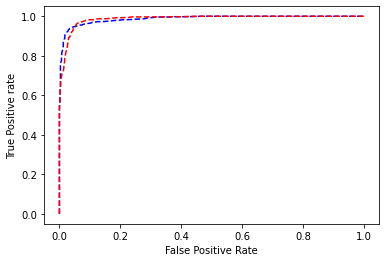

In [135]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.savefig('Multiclass ROC',dpi=300);

# Saving the best model :

In [136]:
import pickle
filename='RainTomorrow.pkl'
pickle.dump(RFC,open(filename,'wb'))

# Predictions :

In [137]:
predictions=RFC.predict(x_test)

In [138]:
predictions

array([0, 0, 1, ..., 1, 0, 0])

In [139]:
pd.DataFrame([predictions[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
2451,0,0
2452,1,1
2453,1,1
2454,0,0


Hence these are the predicted and original RainTomorrow values in a dataframe.

# Regression models to predict Rainfall :

__Variance Inflation Factor :__

In [140]:
# Spliting the dataset

x=df.drop(['Rainfall'],axis=1) # Data Part
x.head(1)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,2.321507,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,8.0,4.503183,16.9,21.8,0,0,1,12,2008


In [141]:
y=df.Rainfall
y.head()

0    0.774597
1    0.000000
2    0.000000
3    0.000000
4    1.000000
Name: Rainfall, dtype: float64

In [142]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [143]:
vif_calc()

    VIF Factor       Features
0     5.041227       Location
1    58.432850        MinTemp
2   438.261741        MaxTemp
3    27.344662    Evaporation
4    16.962003       Sunshine
5     5.289461    WindGustDir
6    23.544389  WindGustSpeed
7     4.645134     WindDir9am
8     5.805252     WindDir3pm
9     5.961256   WindSpeed9am
10    9.454747   WindSpeed3pm
11   68.827202    Humidity9am
12   49.756505    Humidity3pm
13    8.600794       Cloud9am
14    8.653156       Cloud3pm
15  189.599315        Temp9am
16  507.195488        Temp3pm
17    1.722318      RainToday
18    1.832943   RainTomorrow
19    4.206354            Day
20    5.199512          Month
21  187.568158           Year


Now, here we will find the highest values, which are Year, Temp3pm, Temp9am, MaxTemp.

Now we need to check the individual impact on the target[Rainfall], from these attributes.

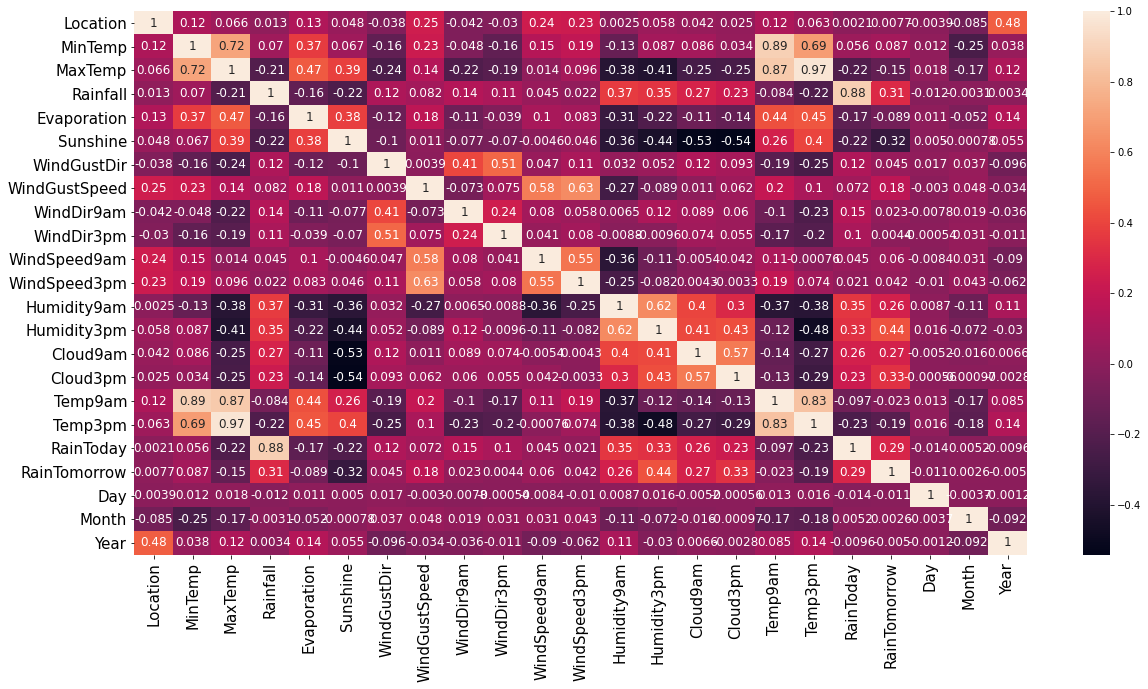

In [144]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

All the features have moderate correlation with the target.

However, we can drop Temp3pm and MaxTemp because of very high multi colinearity :

In [145]:
df.drop(['Temp3pm','MaxTemp'],axis=1,inplace=True)

In [146]:
df.head(1)

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,0.774597,2.321507,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,8.0,4.503183,16.9,0,0,1,12,2008


_Successfully dropped._

# Feature Scaling :

In [147]:
x=df.drop(['Rainfall'],axis=1) # Data Part
y=df.Rainfall

In [148]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
0,-1.507776,0.059447,0.219592,-0.018551,1.228592,0.367555,1.254647,1.399239,0.713482,0.639793,0.192046,-1.621086,1.432433,0.018861,-0.138197,-0.533503,-0.538967,-1.672624,1.633712,-1.661407
1,-1.507776,-1.054857,0.219592,-0.018551,1.441051,0.367555,-0.274722,1.625449,-0.985979,0.423097,-1.450102,-1.454034,0.017582,0.018861,-0.084426,-0.533503,-0.538967,-1.558964,1.633712,-1.661407
2,-1.507776,-0.033411,0.219592,-0.018551,1.653510,0.524252,1.254647,1.625449,0.607266,0.856488,-1.815024,-1.175613,0.017582,-1.071939,0.596677,-0.533503,-0.538967,-1.445305,1.633712,-1.661407
3,-1.507776,-0.720566,0.219592,-0.018551,-0.683538,-1.199419,0.380722,-1.767697,-0.242465,-0.985422,-1.389282,-1.955191,0.017582,0.018861,0.076888,-0.533503,-0.538967,-1.331645,1.633712,-1.661407
4,-1.507776,0.820889,0.219592,-0.018551,1.228592,0.132509,-1.367129,-0.184229,-0.667330,0.206402,0.861069,-1.008561,1.020346,1.542654,0.023117,-0.533503,-0.538967,-1.217985,1.633712,-1.661407
5,-1.507776,0.282308,0.219592,-0.018551,1.441051,1.307739,1.254647,1.173029,0.607266,0.639793,-0.781079,-1.565402,0.017582,0.018861,0.524982,-0.533503,-0.538967,-1.104326,1.633712,-1.661407
6,-1.507776,0.226593,0.219592,-0.018551,1.228592,0.837647,1.036166,1.173029,0.713482,0.639793,-1.146001,-1.788138,-1.452178,0.018861,0.076888,-0.533503,-0.538967,-0.990666,1.633712,-1.661407
7,-1.507776,-0.999142,0.219592,-0.018551,1.228592,-0.337584,0.599203,1.173029,-0.773547,-0.118641,-1.206821,-1.788138,0.017582,0.018861,-0.245740,-0.533503,-0.538967,-0.877006,1.633712,-1.661407
8,-1.507776,-0.627707,0.219592,-0.018551,-0.258620,3.188108,0.380722,-0.184229,-0.667330,1.073183,-1.571743,-2.344979,0.017582,0.018861,0.112735,-0.533503,1.855401,-0.763347,1.633712,-1.661407
9,-1.507776,0.003732,0.219592,-0.018551,1.228592,-0.886025,0.162241,0.494400,0.182400,-0.768727,-0.598618,-1.342666,0.017582,0.018861,0.435363,1.874404,-0.538967,-0.649687,1.633712,-1.661407


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [149]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
0,-1.493727,0.040520,0.166047,-0.120815,1.210412,0.450267,1.227022,1.447457,0.817227,0.679181,0.146185,-1.665400,1.593680,-0.059271,-0.146551,-0.533503,-0.538967,-1.672067,1.606223,-2.02062
1,-1.493727,-1.052161,0.166047,-0.120815,1.402597,0.450267,-0.216794,1.701614,-1.067074,0.477499,-1.406081,-1.486271,-0.093338,-0.059271,-0.092910,-0.533503,-0.538967,-1.558511,1.606223,-2.02062
2,-1.493727,-0.052452,0.166047,-0.120815,1.592773,0.594709,1.227022,1.701614,0.730241,0.875976,-1.726745,-1.189746,-0.093338,-1.066894,0.591811,-0.533503,-0.538967,-1.444950,1.606223,-2.02062
3,-1.493727,-0.728780,0.166047,-0.120815,-0.664089,-1.281773,0.436091,-1.690881,-0.097528,-0.999650,-1.352020,-2.026145,-0.093338,-0.059271,0.068409,-0.533503,-0.538967,-1.331384,1.606223,-2.02062
4,-1.493727,0.816837,0.166047,-0.120815,1.210412,0.224999,-1.433026,-0.227767,-0.625621,0.270030,0.857386,-1.013150,1.058853,1.672462,0.014569,-0.533503,-0.538967,-1.217813,1.606223,-2.02062


Let's again check our VIF after power transformation

In [150]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [151]:
vif_calc()

    VIF Factor       Features
0     1.519747       Location
1     8.585544        MinTemp
2     1.503661    Evaporation
3     2.025584       Sunshine
4     1.597794    WindGustDir
5     2.172479  WindGustSpeed
6     1.306532     WindDir9am
7     1.420776     WindDir3pm
8     1.983191   WindSpeed9am
9     1.973517   WindSpeed3pm
10    3.058073    Humidity9am
11    2.281642    Humidity3pm
12    1.914791       Cloud9am
13    1.800913       Cloud3pm
14    9.381091        Temp9am
15    1.317863      RainToday
16    1.407956   RainTomorrow
17    1.002648            Day
18    1.136840          Month
19    1.452962           Year


As we can observe here, after power transformation, the VIF values has reduced to a good exceptable range, and so we can proceed further with this dataset.

# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [152]:
# Importing the necessary libraries :

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Spliting dataframe and finding best random state

In [153]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.8159427848480659 on random state 680


# Required Evaluation Metrices :

In [154]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=680)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [155]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 0.4738681263686266
r2 Score is: 81.5942784848066
Cross Validation Score: 78.07215180799079
Difference between r2 Score and Cross Validation Score is 3.5221266768158017


In [156]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 0.473874302002444
r2 Score is: 81.59379874063063
Cross Validation Score: 78.07169733268495
Difference between r2 Score and Cross Validation Score is 3.5221014079456836


In [157]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 0.49040640848619194
r2 Score is: 80.28711789749188
Cross Validation Score: 77.08916713955638
Difference between r2 Score and Cross Validation Score is 3.1979507579355015


In [158]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 0.4738373570600712
r2 Score is: 81.59666865585376
Cross Validation Score: 78.07349198528728
Difference between r2 Score and Cross Validation Score is 3.5231766705664853


In [159]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.4838548012008263
r2 Score is: 80.81030992745065
Cross Validation Score: 72.96842412235954
Difference between r2 Score and Cross Validation Score is 7.84188580509111


In [160]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.49904854017449035
r2 Score is: 79.58622000250493
Cross Validation Score: 76.57212950714208
Difference between r2 Score and Cross Validation Score is 3.0140904953628507


In [161]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.460793446815125
r2 Score is: 82.59594531473746
Cross Validation Score: 77.31564968756179
Difference between r2 Score and Cross Validation Score is 5.280295627175676


In [162]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 0.6230035255855723
r2 Score is: 68.18595729914539
Cross Validation Score: 65.69330980928922
Difference between r2 Score and Cross Validation Score is 2.492647489856168


In [163]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 0.4166694809982419
r2 Score is: 85.76946478619377
Cross Validation Score: 80.21624994583463
Difference between r2 Score and Cross Validation Score is 5.553214840359132


In [164]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 0.4166694809982419
r2 Score is: 85.76946478619377
Cross Validation Score: 80.21624994583463
Difference between r2 Score and Cross Validation Score is 5.553214840359132


In [165]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 0.44677810861977896
r2 Score is: 83.63855632983147
Cross Validation Score: 78.99722595913985
Difference between r2 Score and Cross Validation Score is 4.64133037069162


In [166]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 0.49533013922643804
r2 Score is: 79.88929204235284
Cross Validation Score: 77.08123488260685
Difference between r2 Score and Cross Validation Score is 2.808057159745985


In [167]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 0.38030649355732016
r2 Score is: 88.14489697058472
Cross Validation Score: 83.3280048223869
Difference between r2 Score and Cross Validation Score is 4.816892148197823


After finding all the scores of various models, we found that ExtraTreesRegressor model gives the highest r2 score, and less difference between r2 score and cross validation score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of ExtraTreesRegressor Model

In [168]:
ExtraTreesRegressor(n_estimators=300,
    criterion={"squared_error", "absolute_error"},
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features={"auto", "sqrt", "log2"},
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

ExtraTreesRegressor(criterion={'absolute_error', 'squared_error'},
                    max_features={'auto', 'log2', 'sqrt'}, n_estimators=300)

These are the various parameters for ExtraTreesRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [169]:
params={'n_estimators':[300],
    'criterion':["squared_error", "absolute_error"],
    'max_features':["auto", "sqrt", "log2"]}

In [170]:
grid=GridSearchCV(ExtraTreesRegressor(), params, cv=5)

In [171]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]})

In [174]:
grid.best_params_

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 300}

So here we have found the best parameters for our model, and now we can finally train our model.

In [175]:
ETR=ExtraTreesRegressor(criterion='squared_error',
                        max_features='log2',
                        n_estimators=300)

In [176]:
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  85.23743057213711


# Saving the best model :

In [177]:
import pickle
filename='Rainfall.pkl'
pickle.dump(ETR,open(filename,'wb'))

# Predictions :

In [178]:
predictions=ETR.predict(x_test)

In [179]:
predictions

array([0.0458551 , 0.1498556 , 0.23032806, ..., 1.        , 0.02741256,
       0.        ])

In [180]:
pd.DataFrame([predictions[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.045855,0.000000
1,0.149856,0.000000
2,0.230328,0.000000
3,0.042590,0.000000
4,0.000000,0.000000
...,...,...
1580,0.080066,0.000000
1581,2.739522,2.529822
1582,1.000000,1.000000
1583,0.027413,0.000000


# __<font color='orange'>THANK YOU.</font>__